In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_score, recall_score
)

In [5]:
# Step 2: Load and clean data
df = pd.read_csv("data.csv")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Convert to binary

In [7]:
# Step 3: Train-test split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 4: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Step 5: Fit logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
# Step 6: Predictions and evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities

In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


## The confusion matrix shows that out of 71 actual class 0 instances, 70 were correctly predicted as class 0, and 1 was incorrectly predicted as class 1. Out of 43 actual class 1 instances, 41 were correctly predicted as class 1, and 2 were incorrectly predicted as class 0.

## The classification report provides a more detailed breakdown:

## Precision: For class 0, when the model predicts class 0, it is correct 97% of the time. For class 1, when the model predicts class 1, it is correct 98% of the time.
## Recall: For class 0, the model correctly identifies 99% of all actual class 0 instances. For class 1, the model correctly identifies 95% of all actual class 1 instances.
## F1-score: This is the harmonic mean of precision and recall, providing a balanced measure.
## Support: This is the number of actual occurrences of each class in the dataset.
## The overall accuracy of the model is 97%. The macro average and weighted average of precision, recall, and F1-score are also 97%, indicating good performance across both classes.

## The ROC-AUC score of 0.997 suggests that the model has an excellent ability to distinguish between the two classes.

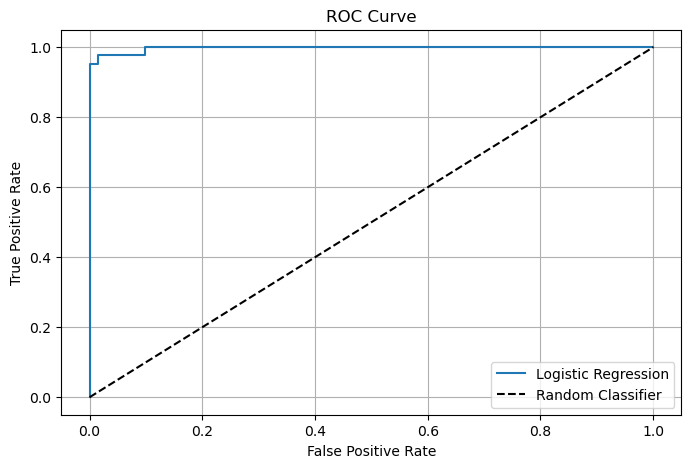

In [17]:
# Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

## The ROC curve you provided shows the performance of two classifiers, Logistic Regression and a Random Classifier, in distinguishing between classes for a binary classification problem.

## The blue line (Logistic Regression) indicates that the model has a high true positive rate with a low false positive rate, demonstrating good performance.
## The dashed black line (Random Classifier) represents the baseline, where predictions are made randomly; it forms the diagonal line from (0,0) to (1,1).
## If you'd like, I can help analyze the ROC curve in more detail, compute the Area Under the Curve (AUC), or assist with further model evaluation.

In [19]:
# Step 8: Threshold tuning example
threshold = 0.3
y_pred_thresh = (y_prob >= threshold).astype(int)
print("\nThreshold Tuned Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))


Threshold Tuned Confusion Matrix:
 [[67  4]
 [ 1 42]]


In [21]:
# Step 9: Sigmoid Function Explanation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

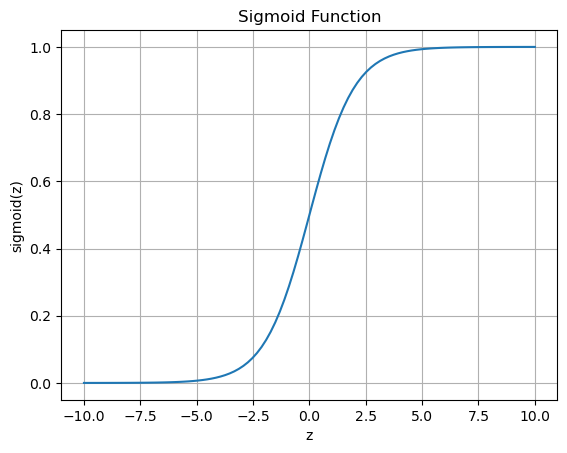

In [23]:
# Visualizing sigmoid
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

## The plot shows the sigmoid function, which is commonly used as an activation function in neural networks and logistic regression. It maps any real-valued number into a value between 0 and 1, making it useful for probability estimation.

## If you need any explanation, analysis, or assistance with the sigmoid function or anything related, please let me know!

